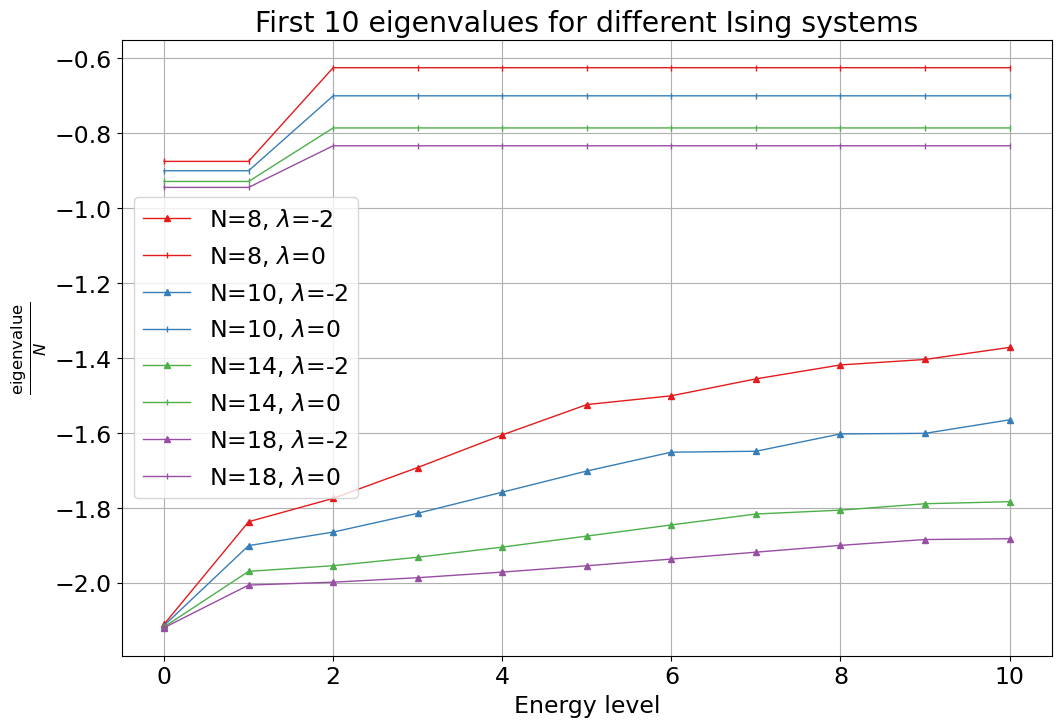

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Set the display options
pd.set_option('display.max_rows', 200)
plt.rcParams.update({'font.size': 17}) #setting font size for the plots
color_cycle = plt.cm.Set1.colors  # Setting a predefined colormap for the plots
markers = ['o', 's', 'D', '^', '|','v', '<', '>', 'p', 'h', 'H', '+', 'x', 'd', '|', '_']

# Define the number of sites to be investigated
num_sites = [8,10,14,18]

# Plot the first 10 eigenvalues for each system
plt.figure(figsize=(12,8))

# Loop over the number of sites
ii=0
for N_value in num_sites:
    
    # Set the color for the specific N
    colr = color_cycle[ii]
    ii+=1

    # Generate a list of CSV files with the specific number in the name
    csv_files = glob.glob(os.path.join('./data', f'N{N_value}_*.csv')) 


    column_names = ['Level', 'Eigenvalue', 'lambda', 'N']

    # Initialize an empty list to store DataFrames
    dfs = []

    # Iterate over the list of CSV files
    for file in csv_files:
        # Read each CSV file into a DataFrame
        df = pd.read_csv(file, names=column_names)
        # Append the DataFrame to the list
        dfs.append(df)

    # Concatenate all DataFrames in the list into a single DataFrame
    combined_df = pd.concat(dfs, ignore_index=True)

    #Choose the values of lambda to be considered for the plot
    #unique_lams = combined_df['lambda'].unique()
    unique_lams = [-2,0]

    jj=3 #counter for the markers, starting from 3
    for lam in unique_lams: #loop over the unique values of lambda
        # Select the rows of the DataFrame with the specific lambda
        df1 = combined_df[combined_df['lambda']==lam]

        # Select the rows only some of the initial emergy levels
        df1 = df1[df1['Level']<11]

        # Plot the eigenvalues
        plt.plot(df1['Level'], df1['Eigenvalue'], color=colr,label=f'N={N_value}, $\lambda$={lam}', marker=markers[jj], linewidth=1, markersize=4)
       
        jj+=1

# Add a legend, grid, labels and title
plt.grid('True')
plt.legend()
plt.xlabel('Energy level')
plt.ylabel(r'$\frac{\mathrm{eigenvalue}}{N}$')
plt.title('First 10 eigenvalues for different Ising systems')
plt.savefig(f'/home/albertos/quantumInfo/ex7/plots/eigvals_vs_level.svg', format='svg', bbox_inches='tight')

plt.show()



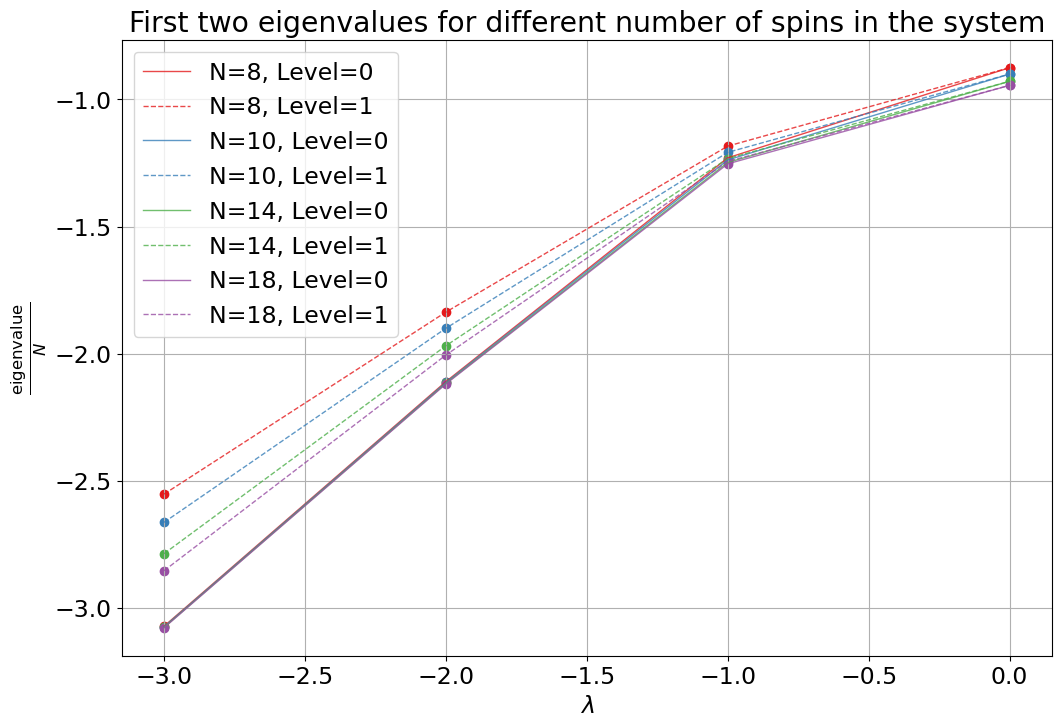

In [11]:
# Set the display options
linestyles = ['-', '--', ':']

# Define the number of sites to be investigated
num_sites_2 = [8,10,14,18]

# Plot the first two eigenvalues for each system
plt.figure(figsize=(12, 8))

ii=0 #counter for the colors
for NN in num_sites_2:
    colr = color_cycle[ii]
    ii+=1
    
    # Generate a list of CSV files with the specific number in the name
    csv_files = glob.glob(os.path.join('./data', f'N{NN}_*.csv')) 

    # Define the column names for the DataFrames
    column_names = ['Level', 'Eigenvalue', 'lambda', 'N'] 

    # Initialize an empty list to store DataFrames
    dfs = []
    # Iterate over the list of CSV files
    for file in csv_files:
        # Read each CSV file into a DataFrame
        df = pd.read_csv(file, names=column_names)

        # Select the rows only for the first two energy levels
        df=df[df['Level']<2] 

        # Append the DataFrame to the list
        dfs.append(df)

    # Concatenate all DataFrames in the list into a single DataFrame
    combined_df = pd.concat(dfs, ignore_index=True)

    # Plot the eigenvalues
    unique_levels = combined_df['Level'].unique()
    jj=0
    for levls in unique_levels:
        # Set the color and linestyle for the specific level
        lst = linestyles[jj]
        jj+=1

        # Select the rows of the DataFrame with the specific level
        df1 = combined_df[combined_df['Level']==levls]

        # Sort the rows by the value of lambda
        df1 = df1.sort_values(by='lambda')

        # Plot the eigenvalues
        plt.plot(df1['lambda'], df1['Eigenvalue'], label=f'N={NN}, Level={levls}', color=colr, linestyle=lst, alpha=0.8, linewidth=1)

# Add a legend, grid, labels and title        
plt.xlabel('$\lambda$')
plt.ylabel(r'$\frac{\mathrm{eigenvalue}}{N}$')
plt.title('First two eigenvalues for different number of spins in the system')
plt.legend()
plt.grid(True)
plt.savefig(f'/home/albertos/quantumInfo/ex7/plots/eigvals_vs_lambda.svg', format='svg', bbox_inches='tight')
plt.show()